In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [3]:
path_fldr = Path('/content/drive/My Drive/breadboard')
path_img = path_fldr/'images'
path_lbl = path_fldr/'PixelLabelData'

In [4]:
fnames = get_image_files(path_img)
fnames[:4]

[PosixPath('/content/drive/My Drive/breadboard/images/001.jpg'),
 PosixPath('/content/drive/My Drive/breadboard/images/002.jpg'),
 PosixPath('/content/drive/My Drive/breadboard/images/003.jpg'),
 PosixPath('/content/drive/My Drive/breadboard/images/004.jpg')]

In [5]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/content/drive/My Drive/breadboard/PixelLabelData/Label_4.png'),
 PosixPath('/content/drive/My Drive/breadboard/PixelLabelData/Label_1.png'),
 PosixPath('/content/drive/My Drive/breadboard/PixelLabelData/Label_2.png')]

In [6]:
get_label_fn = lambda x: path_lbl/f'Label_{x.stem.lstrip("0")}.png'

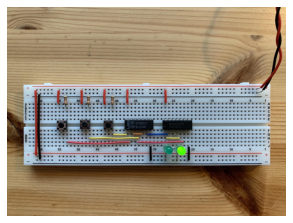

In [7]:
image = open_image(fnames[0])
image.show(figsize=(5,5))

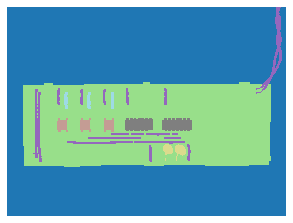

In [8]:
mask = open_mask(get_label_fn(fnames[0]))
mask.show(figsize=(5,5), alpha=1)

In [9]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([1536, 2048]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [10]:
codes = np.loadtxt(path_fldr/'codes.txt', dtype=str);
#codes = codes[:9]; codes

In [11]:
size = src_size//2
print(gpu_mem_get_free_no_cache())
bs=3

15068


In [12]:
src = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct(0.4)
        .label_from_func(get_label_fn, classes=codes))

In [13]:
data = (src.transform(get_transforms(), tfm_y=True, size=size)
      .databunch(bs=bs)
      .normalize(imagenet_stats))

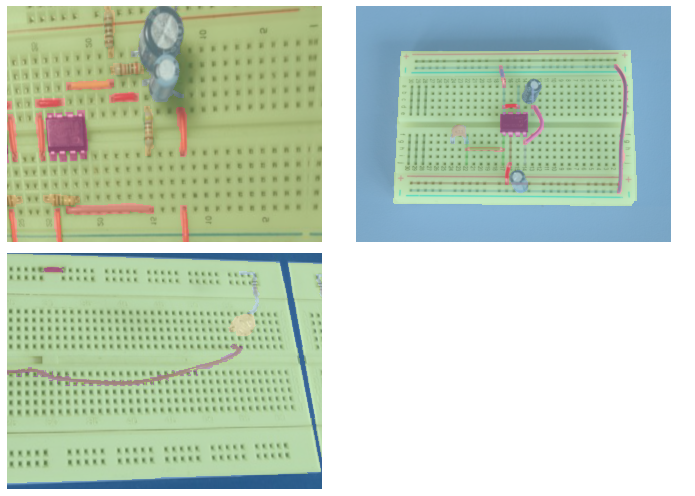

In [14]:
data.show_batch(4, figsize=(10,7))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


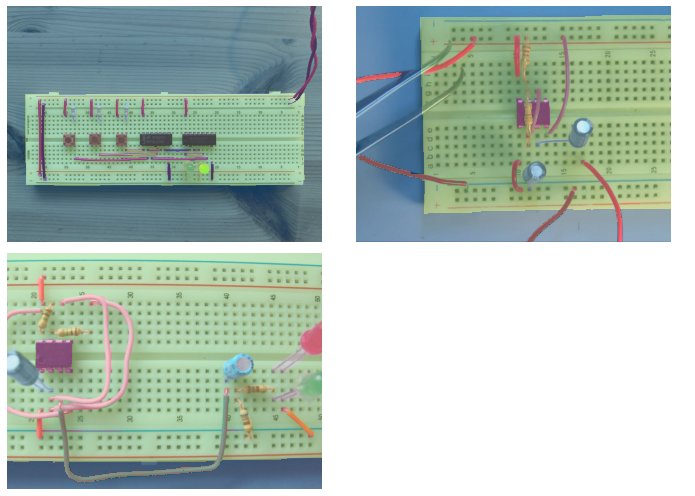

In [15]:
data.show_batch(4, figsize=(10,7), ds_type=DatasetType.Valid)

In [ ]:
learn = unet_learner(data, models.resnet50, metrics=accuracy, wd=1e-2)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
lr=1e-4

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1');

In [ ]:
learn.show_results(rows=2, figsize=(20,20))